In [4]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [5]:
# numbers

N_na =   24 #8.65425            # 4.1819047     # bound Na+ ions
N_g   = 24                  # binding sites total
c_na = 0.13181982729990038  # mol/L ; 0.0793819 nm^-3
reff =   1.78               # 1.505      # nm
r_g  =   1.3778963802321125  #1.40               # bare radius of dPGS
z_g  = -1                   # charge on single binding site (sulfate group)
V_eff  = 4*np.pi/3*reff**3    # Donnan volume
v_d = 6.24                    # dPGS volume
V_g  =   4*np.pi/3*r_g**3   # bare dPGS volume
v_0  = 1                    # L/mol; standard volume 1.66 nm^3

sigma_mg = 0.263    # Mamatkulov, Netz MG(2) 
sigma_na = 0.258    # smith, Dang JCP 1993
sigma_cl = 0.440104 # smith, Dang JCP 1993

'''
sasa_vol = np.array([10.9033, 10.8731, 11.0969, 10.9603])
sasa_rd = [(3*vol/4/np.pi)**(1/3) for vol in sasa_vol]
print(np.average(sasa_rd), np.average(sasa_vol))
'''

'\nsasa_vol = np.array([10.9033, 10.8731, 11.0969, 10.9603])\nsasa_rd = [(3*vol/4/np.pi)**(1/3) for vol in sasa_vol]\nprint(np.average(sasa_rd), np.average(sasa_vol))\n'

## Std. one component Langmuir + Donnan for dPGS with monovalent salt

In [5]:
theta_na = N_na / N_g
y        = -z_g*N_g/V_eff/c_na/2
exponent = y + np.sqrt(y**2 + 1)

rhs_langmuir = theta_na / (1 - theta_na) / c_na 

K_0_na_lang = rhs_langmuir / exponent / v_0

print(K_0_na_lang, theta_na)

ZeroDivisionError: float division by zero

In [11]:
N_na/V_g*np.pi/6*sigma_na**3

0.007101480354105008

## Excluded volume model (with negligible packing fraction of condensed counterions) + Donnan, for dPGS with monovalent salt

In [16]:
v_na = 4*np.pi/3*sigma_na**3    # 2B_2 excluded volume of one Na+ ion

#theta_ev_na = v_na * N_na / (V_eff - v_d)
theta_ev_na = v_na * N_na / V_eff

rhs_ev = theta_ev_na / (1 - theta_ev_na) / c_na

K_0_na_ev = rhs_ev / exponent / v_0

print(K_0_na_ev, theta_ev_na)

0.07634361162198183 0.07308198800230932


## Excluded volume model + Donnan, for dPGS with monovalent salt

In [60]:
def DG_cs(x):
    rhs = (8*x - 9*x**2 + 3*x**3)*(1 - x)**(-3)
    return np.exp(-rhs)

In [61]:
#eta_na = (N_na / V_eff) * np.pi/6 * sigma_na**3
eta_na = (N_na / (V_eff - V_g)) * np.pi/6 * sigma_na**3

v_na = 4*np.pi/3*sigma_na**3    # 2B_2 excluded volume of one Na+ ion



rhs_ev = theta_ev_na / DG_cs(eta_na) / c_na

K_0_na_ev = rhs_ev / exponent / v_0

print(K_0_na_ev, theta_ev_na)

0.050020929419908135 0.049153303865841


[1.00250627 1.0048493  1.03431005 1.08612022 1.15458006 1.23483368
 1.32333163 1.41763817 1.51610994 1.61763203 1.72143606 1.82698202
 1.93388253 2.04185416 2.15068565 2.2602168  2.3703242  2.48091144
 2.59190218 2.70323527 2.8148612  2.92673946 3.03883663 3.1511249
 3.26358092 3.37618499 3.48892035 3.60177267 3.71472962 3.82778053
 3.94091612 4.05412831 4.16740999 4.28075491 4.39415754 4.50761299
 4.62111688 4.73466532 4.84825481 4.96188223 5.07554473 5.18923977
 5.30296504 5.41671844 5.53049805 5.64430214 5.75812913 5.87197754
 5.98584605 6.09973343]


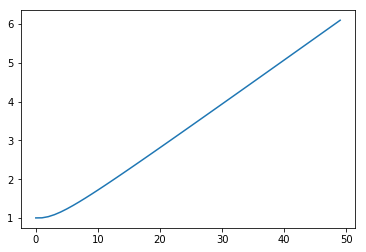

In [73]:
N = 34
cd = 0.05#np.linspace(0.00, 1, 50) #0.1/1000/1.66
c0 = np.linspace(0.00, 200, 50) #150/1000/1.66
V = 1

a = 1 - 2*c0/N/cd
b = cd*cd*V*V

x = (a*b + np.sqrt(a*a*b - b + 1))/(1 - b)

theta = 0.5*(x+1)
plt.plot(theta)
print(theta)

In [17]:
#import MDAnalysis as mda

#help(mda)

19.5 mM Mg2+


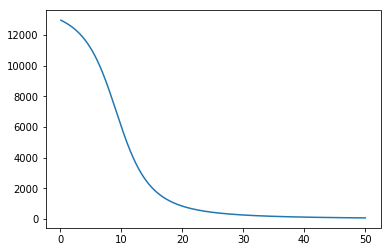

In [88]:
x = np.linspace(0.1, 50, 1000)
N = 10
K = 5000
cd = 0.039/1000/1.66*10 
V0 = 1
dH = 6e7

z = 1 + x/N + 1/N/K/cd
sqt = np.sqrt( np.square(z) - 4*x/N )
theta = 0.5*(z - sqt)

dq = 0.5*dH*V0*cd*(1 - (z-2)/sqt)
plt.plot(x, dq)
print(np.round(x[-1]*cd*1.66*1000, 2), 'mM Mg2+')
# increasing dPGS concentration makes point of inflexion more evident

## McGhee-von Hippel model

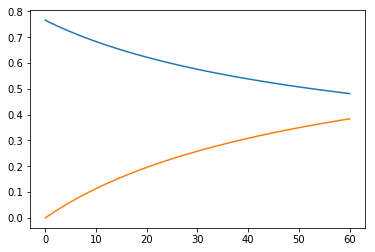

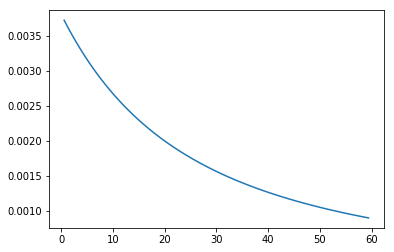

6.525857975255321 16.37056669205523


In [137]:
ka       = 1e3        # (mol/L)^-1
kb       = 5e3        # (mol/L)^-1
Nb       = 17
c0_a     = 4.1/1000   # mol/L
cd       = 0.032/1000 # mol/L
xb_max   = 60
number_of_points      = 100
xb_array = np.linspace(0.001, xb_max, number_of_points)
V0       = 1          # L
dHA      = 100         # kJ/mol
dHB      = 1000       # kL/mol

a        = kb*Nb
b        = 1/cd
c        = ka*Nb
xa       = c0_a/cd
d        = ka*xa

def mvh(p, xb):
    '''
    x, y, ca, cb = p  # x = \Theta_A(x) ; y = \Theta_B(x)
    F = np.empty((4))
    
    F[0] = ka*ca*(1-x-y) - x 
    F[1] = 4*kb*cb*(1-x-y)**2 - y*(2-y)
    F[2] = b*ca - xa + 2*Nb*x
    F[3] = b*cb - xb + Nb*y
    '''
    
    x, y = p  # x = \Theta_A(x) ; y = \Theta_B(x)
    F = np.empty((2))
    
    F[0] = a*y**3 + 2*a*x*y**2 + a*y*x**2 +\
           (-kb*xb - 2*a - 0.25*b)*y**2 + (-kb*xb)*x**2 +\
           (-2*kb*xb - 2*a)*x*y + (2*kb*xb + a + 0.5*b)*y + (2*kb*xb)*x + (-kb*xb)
    
    F[1] = 2*c*x**2 + 2*c*x*y + (-d - 2*c - b)*x + (-d)*y + d 
    
        
    return F
    
pGuess = np.array([1, .0])
#pGuess = np.array([1, .0, c0_a, xb_max*cd])

theta_a = []
theta_b = []

for i in range(number_of_points):
    z = fsolve(mvh, pGuess, args = (xb_array[i]))
    theta_a.append(z[0])
    theta_b.append(z[1])
    
plt.plot(xb_array, theta_a, xb_array, theta_b)
#plt.plot(theta_a, theta_b)
plt.show()

dQ = []

for i in range(1, n-1):
    
    dtheta_B = 0.5*( theta_b[i+1] - theta_b[i-1] )
    dtheta_A = 0.5*( theta_a[i+1] - theta_a[i-1] )
    
    dQ.append( Nb*cd*V0*(dHB*dtheta_B + 2*dHA*dtheta_A) )
    
plt.plot(xb_array[1:n-1], dQ)
plt.show()
print(theta_b[-1]*Nb, theta_a[-1]*2*Nb)

## McGhee-von Hippel-Manning model

In [7]:
ca0 = 1
cb0 = 1
lb =  0.7 # Bjerrum length (nm) for SPC/E water at 300K is 0.78
R = 1.7 # reff nm
Vb = 4 * np.pi / 3 * R**3
z_mg = 2 # these are charge VALENCIES
z_na = 1
z_cl = -1
z_s = -1 
Na  = 34
Nb = 0.5*Na

def cb(cb0, cd, Nb, theta_B):
    return cb0 - cd*Nb*theta_B

def ca(ca0, cd, Na, theta_A):
    return ca0 - cd*Na*theta_A


def kappa(*conc):
    
    mg_conc, na_conc, cl_conc = conc
    
    I = 0.5 * (  mg_conc*z_mg**2\
               + na_conc*z_na**2\
               + cl_conc*z_cl**2 ) * 1.66 # molar M
    
    k = (8 * np.pi * lb * I / 1.66 )**0.5
    
    return k, I 


def chi(Na, lb, R, *conc):
    return Na * lb / ( R*(1+(kappa(*conc)[0]*R)) )

In [22]:
comp_050mM = [0, 0.0197266, 0.00790753]
comp_100mM = [0, 0.0595398, 0.0537438]
comp_131mM = [0, 0.0794375, 0.074526]
comp_496mM = [0, 0.2988930, 0.297942 ]
V   = [ 979.978, 978.968, 978.512, 973.351]
na =  [ 32, 73, 93, 304]

na0  = na[0]
V0   = V[0]
ca   = comp_050mM[1]
Na   = 24
f    = ca*V0
X1   = (na0 - f)**2
X2   = ca*(Na - (na0 - f))
C    = chi(Na, lb, R, *comp_050mM) / Na
Y    = na0 / f

lnK0 = np.log(X1/X2) - C*(X2/ca) - na0/f #- np.log(Vb)
print(np.exp(lnK0), np.sqrt(X1))

10.83405118942551 12.668365985200001


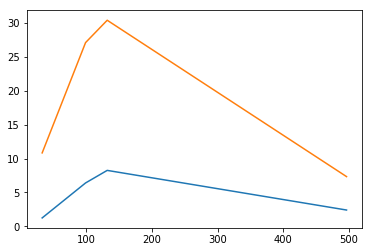

In [24]:
conc = [32.758, 98.836, 131.774, 496.163]
K0_with_v0   = [1.2476959818147286, 6.402977664429093,\
                8.254664198187992, 2.410197086036613]
K0_without_v0 = [ 10.83405118942551, 27.09747679233088,\
                 30.393214245268286, 7.338979677407909]

plt.plot(conc, K0_with_v0, conc, K0_without_v0)

In [141]:
import MDAnalysis as mda
mda?

In [34]:
a = [1.0, 2.0, 3.1]
b = np.array(a)
print(b)
print(type(b))
np.random.

[1.  2.  3.1]
<class 'numpy.ndarray'>


In [ ]:
'''
    y3  = np.power(y,3)
    xyy = np.multiply(x, np.power(y,2))
    xxy = np.multiply(np.power(x,2), y)
    xb_yy = np.multiply(xb, np.power(y,2))
    xb_xx = np.multiply(xb, np.power(x,2))
    xb_xy = np.multiply(xb, np.multiply(x, y))
    
    
    eq1 = a*y_3 + 2*a*xyy + a*xxy + (-kb)*xb_yy +\
          (-2*a - b)*np.power(y,2)+(-kb)*xb_xx + (-2*kb)*xb_xy
'''